In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("cleaned_smartprix_laptop3.xlsx")

# Pre Processing

### Encode Categorical Variables

#### Label Encoding: Convert categories to numeric labels if needed.
#### One-Hot Encoding: Convert categorical variables into a set of binary variables.

In [4]:
# Scale Numerical Features

# Standardization: Scale features to have a mean of 0 and standard deviation of 1.
# Normalization: Scale features to a range between 0 and 1.

In [5]:
df.columns

Index(['productName', 'price', 'rating', 'specScore', 'features', 'brand',
       'processor', 'storage', 'cores', 'ram', 'screen_size', 'Warranty', 'OS',
       'graphics', 'storage_type', 'ram_type', 'resolution',
       'graphics_category', 'resolution_category'],
      dtype='object')

In [6]:
#removing unneccasary cols

df = df[['price', 'rating', 'specScore','brand', 'processor', 'storage', 'ram', 'screen_size', 'Warranty', 'OS', 'storage_type', 'ram_type', 'graphics_category', 'resolution_category']]

In [7]:
df.head()

,price,rating,specScore,brand,processor,storage,ram,screen_size,Warranty,OS,storage_type,ram_type,graphics_category,resolution_category
0,69990,4.60,69,Asus,Intel Core i5,512,16,16.0,12,Windows 11,SSD,DDR4,NVIDIA,Widescreen (16:10)
1,74990,4.05,71,Asus,Intel Core i5,1024,16,16.0,12,Windows 11,SSD,DDR4,NVIDIA,Widescreen (16:10)
2,28660,4.20,62,Lenovo,AMD Ryzen 3,512,8,15.6,12,Windows 11,SSD,DDR4,Other/Unknown,Standard HD (16:9)
3,57990,4.75,61,HP,Intel Core i5,512,16,15.6,12,Windows 11,SSD,DDR4,NVIDIA,Standard HD (16:9)
4,24990,4.05,54,Acer,Intel Core i3,512,8,14.0,12,Windows 11,SSD,DDR4,Intel,Standard HD (16:9)


In [8]:
#when there is order in categories : apply label else apply ohe

# brand - ohe
# processor - label
# OS - ohe
# storage_type - label
# ram_type - label
# graphics_category - label
# resolution_category - label

- When dealing with categorical variables in machine learning, it's essential to choose the right encoding technique based on whether the categories have an inherent order (ordinal) or not (nominal). Here’s a step-by-step approach to handling this:

    1. Identify Ordinal vs. Nominal Categories
    Ordinal: Categories with a meaningful order but no fixed interval between them (e.g., low, medium, high).
    Nominal: Categories with no meaningful order (e.g., brand, color).

    2. Apply Label Encoding for Ordinal Data
    Label encoding assigns a unique integer to each category and is suitable for ordinal data because it retains the order.

    3. Apply One-Hot Encoding for Nominal Data
    One-hot encoding converts categorical variables into binary columns, which is suitable for nominal data because it does not impose any ordinal relationships.

### OHE for brand & OS since they dont have any order

In [9]:
# Columns to encode
columns_to_encode = ['brand', 'OS']

# Separate columns to encode from the rest
df_to_encode = df[columns_to_encode]
df_rest = df.drop(columns=columns_to_encode)

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_to_encode)

# Combine encoded columns with the rest of the DataFrame
df_final = pd.concat([df_rest, df_encoded], axis=1)

In [10]:
df_final.head(2)

,price,rating,specScore,processor,storage,ram,screen_size,Warranty,storage_type,ram_type,...,OS_Mac,OS_Mac 10.15.3,OS_Mac Catalina,OS_No,OS_Ubuntu,OS_Windows,OS_Windows 10,OS_Windows 10,OS_Windows 11,OS_Windows 11
0,69990,4.60,69,Intel Core i5,512,16,16.0,12,SSD,DDR4,...,0,0,0,0,0,0,0,0,1,0
1,74990,4.05,71,Intel Core i5,1024,16,16.0,12,SSD,DDR4,...,0,0,0,0,0,0,0,0,1,0


In [11]:
df_final.shape

(1018, 38)

### Label encode for the rest

In [12]:
df_final['processor'].unique()

array(['Intel Core i5', 'AMD Ryzen 3', 'Intel Core i3', 'AMD Ryzen 7',
       'Intel Core i7', 'Apple M Series', 'Intel Core i9', 'AMD Ryzen 5',
       'Others', 'AMD Ryzen 9', 'Intel Core Ultra'], dtype=object)

In [13]:
# Define the ranking order for processors
rank_order = [
    'Intel Core i5',
    'AMD Ryzen 3',
    'Intel Core i3',
    'AMD Ryzen 7',
    'Intel Core i7',
    'Apple M Series',
    'Intel Core i9',
    'AMD Ryzen 5',
    'Others',
    'AMD Ryzen 9',
    'Intel Core Ultra'
]

# Create a mapping dictionary
processor_mapping = {processor: idx for idx, processor in enumerate(rank_order)}

# Apply the mapping to the 'processor' column
df_final['processor_encoded'] = df_final['processor'].map(processor_mapping)

In [14]:
df_final.sample(5)

,price,rating,specScore,processor,storage,ram,screen_size,Warranty,storage_type,ram_type,...,OS_Mac 10.15.3,OS_Mac Catalina,OS_No,OS_Ubuntu,OS_Windows,OS_Windows 10,OS_Windows 10,OS_Windows 11,OS_Windows 11,processor_encoded
70,80990,4.55,61,Intel Core i5,512,16,15.6,12,SSD,DDR4,...,0,0,0,0,0,0,0,1,0,0
44,19999,4.20,50,Intel Core i5,512,8,14.1,12,SSD,DDR4,...,0,0,0,0,0,0,0,1,0,0
587,58491,4.05,63,Intel Core i5,512,16,15.6,12,SSD,DDR4,...,0,0,0,0,0,0,0,1,0,0
485,65990,4.70,59,AMD Ryzen 5,1024,16,15.6,12,SSD,DDR4,...,0,0,0,0,0,0,0,1,0,7
632,58990,4.65,57,Intel Core i5,512,8,14.0,12,SSD,DDR4,...,0,0,0,0,0,0,0,1,0,0


In [15]:
df_final['storage_type'].unique()

array(['SSD', 'hard disk', 'HDD', 'UFS'], dtype=object)

In [16]:
# Define the ranking order for storage types
storage_rank_order = [
    'SSD',        # Highest rank
    'UFS',        # Second highest
    'HDD',        # Third highest
    'hard disk'   # Lowest rank
]

# Create the mapping dictionary
storage_mapping = {storage: idx for idx, storage in enumerate(storage_rank_order)}

# Apply the mapping to the 'storage_type' column
df_final['storage_type_encoded'] = df_final['storage_type'].map(storage_mapping)

In [17]:
df_final

,price,rating,specScore,processor,storage,ram,screen_size,Warranty,storage_type,ram_type,...,OS_Mac Catalina,OS_No,OS_Ubuntu,OS_Windows,OS_Windows 10,OS_Windows 10,OS_Windows 11,OS_Windows 11,processor_encoded,storage_type_encoded
0,69990,4.60,69,Intel Core i5,512,16,16.0,12,SSD,DDR4,...,0,0,0,0,0,0,1,0,0,0
1,74990,4.05,71,Intel Core i5,1024,16,16.0,12,SSD,DDR4,...,0,0,0,0,0,0,1,0,0,0
2,28660,4.20,62,AMD Ryzen 3,512,8,15.6,12,SSD,DDR4,...,0,0,0,0,0,0,1,0,1,0
3,57990,4.75,61,Intel Core i5,512,16,15.6,12,SSD,DDR4,...,0,0,0,0,0,0,1,0,0,0
4,24990,4.05,54,Intel Core i3,512,8,14.0,12,SSD,DDR4,...,0,0,0,0,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,149990,4.50,77,Intel Core i7,1024,16,16.0,12,SSD,DDR5,...,0,0,0,0,0,0,1,0,4,0
1014,58990,4.10,61,AMD Ryzen 5,1024,16,15.6,12,SSD,DDR4,...,0,0,0,0,0,0,1,0,7,0
1015,33999,4.30,53,Intel Core i3,256,8,15.6,12,SSD,DDR4,...,0,0,0,0,0,0,1,0,2,0
1016,31890,4.25,51,AMD Ryzen 3,512,8,15.6,12,SSD,LPDDR5,...,0,0,0,0,0,0,1,0,1,0


In [18]:
df_final['ram_type'].unique()

array(['DDR4', 'DDR5', 'LPDDR5', 'LPDDR5X', nan, 'LPDDR4X', 'DDR6',
       'DDR5 SD', 'LPDDR4', 'Unified Memory', 'LPDDRx4', 'DDR3', 'LPDDR3',
       '\u200eLPDDR5X'], dtype=object)

In [22]:
# Define the ranking order for RAM types
ram_rank_order = [
    'DDR4',
    'DDR5',
    'LPDDR5',
    'LPDDR5X',
    'LPDDR4X',
    'DDR6',
    'DDR5 SD',
    'LPDDR4',
    'Unified Memory',
    'LPDDRx4',
    'DDR3',
    'LPDDR3'
]

# Normalize ram_type by replacing special characters and trimming spaces
df_final['ram_type_normalized'] = df_final['ram_type'].astype(str).str.replace(r'\u200e', '', regex=True).str.strip()

# Handle missing values in ranking
ram_rank_order.append('nan')  # Add a rank for missing values

# Create the mapping dictionary
ram_mapping = {ram: idx for idx, ram in enumerate(ram_rank_order)}

# Apply the mapping to the normalized 'ram_type' column
df_final['ram_type_encoded'] = df_final['ram_type_normalized'].map(lambda x: ram_mapping.get(x, ram_mapping['nan']))

In [23]:
df_final.sample(4)

,price,rating,specScore,processor,storage,ram,screen_size,Warranty,storage_type,ram_type,...,OS_Ubuntu,OS_Windows,OS_Windows 10,OS_Windows 10,OS_Windows 11,OS_Windows 11,processor_encoded,storage_type_encoded,ram_type_normalized,ram_type_encoded
651,87990,4.70,61,Intel Core i7,256,8,13.3,12,SSD,DDR4,...,0,0,1,0,0,0,4,0,DDR4,0
932,107990,4.10,63,Intel Core Ultra,1024,16,14.0,12,SSD,LPDDR5X,...,0,0,0,0,1,0,10,0,LPDDR5X,3
730,54990,4.05,62,Intel Core i5,512,16,16.0,12,SSD,DDR4,...,0,0,0,0,1,0,0,0,DDR4,0
88,109670,4.25,47,AMD Ryzen 9,1024,32,14.0,12,SSD,NaN,...,0,0,0,0,1,0,9,0,nan,12


In [24]:
df_final['graphics_category'].unique()

array(['NVIDIA', 'Other/Unknown', 'Intel', 'Qualcomm and ARM'],
      dtype=object)

In [25]:
# Define the ranking order for graphics categories
graphics_rank_order = [
    'NVIDIA',
    'Intel',
    'Qualcomm and ARM',
    'Other/Unknown'
]

# Create the mapping dictionary
graphics_mapping = {category: idx for idx, category in enumerate(graphics_rank_order)}

# Apply the mapping to the 'graphics_category' column
df_final['graphics_category_encoded'] = df_final['graphics_category'].map(lambda x: graphics_mapping.get(x, -1))

In [26]:
df_final.sample(4)

,price,rating,specScore,processor,storage,ram,screen_size,Warranty,storage_type,ram_type,...,OS_Windows,OS_Windows 10,OS_Windows 10,OS_Windows 11,OS_Windows 11,processor_encoded,storage_type_encoded,ram_type_normalized,ram_type_encoded,graphics_category_encoded
101,62849,4.35,70,Intel Core i7,512,16,15.6,24,SSD,DDR4,...,0,0,0,1,0,4,0,DDR4,0,0
883,102999,4.75,68,Intel Core Ultra,512,16,14.0,12,SSD,LPDDR5,...,0,0,0,1,0,10,0,LPDDR5,2,1
78,84990,4.25,73,AMD Ryzen 7,1024,16,15.6,24,SSD,DDR4,...,0,0,0,1,0,3,0,DDR4,0,0
701,180990,4.45,53,Others,1024,16,13.0,12,SSD,LPDDR5X,...,0,0,0,1,0,8,0,LPDDR5X,3,2


In [27]:
df_final['resolution_category'].unique()

array(['Widescreen (16:10)', 'Standard HD (16:9)', 'Quad HD or higher',
       'Widescreen or Custom', 'Other'], dtype=object)

In [28]:
# Define the ranking order for resolution categories
resolution_rank_order = [
    'Widescreen (16:10)',
    'Standard HD (16:9)',
    'Quad HD or higher',
    'Widescreen or Custom',
    'Other'
]

# Create the mapping dictionary
resolution_mapping = {category: idx for idx, category in enumerate(resolution_rank_order)}

# Apply the mapping to the 'resolution_category' column
df_final['resolution_category_encoded'] = df_final['resolution_category'].map(lambda x: resolution_mapping.get(x, -1))

In [29]:
df_final.sample(5)

,price,rating,specScore,processor,storage,ram,screen_size,Warranty,storage_type,ram_type,...,OS_Windows 10,OS_Windows 10,OS_Windows 11,OS_Windows 11,processor_encoded,storage_type_encoded,ram_type_normalized,ram_type_encoded,graphics_category_encoded,resolution_category_encoded
918,50750,4.25,59,Intel Core i7,512,16,15.6,12,SSD,DDR4,...,0,0,1,0,4,0,DDR4,0,1,1
446,50690,4.45,57,Intel Core i5,512,16,15.6,12,SSD,DDR4,...,0,0,1,0,0,0,DDR4,0,1,1
919,157990,4.75,80,Intel Core Ultra,1024,32,16.0,24,SSD,LPDDR5,...,0,0,1,0,10,0,LPDDR5,2,0,2
841,198490,4.65,86,Intel Core i9,1024,32,16.0,12,SSD,DDR5,...,0,0,1,0,6,0,DDR5,1,0,2
367,152990,4.05,63,Intel Core Ultra,1024,16,15.6,12,SSD,LPDDR5X,...,0,0,1,0,10,0,LPDDR5X,3,1,2


In [30]:
df_final.columns

Index(['price', 'rating', 'specScore', 'processor', 'storage', 'ram',
       'screen_size', 'Warranty', 'storage_type', 'ram_type',
       'graphics_category', 'resolution_category', 'brand_Acer', 'brand_Apple',
       'brand_Asus', 'brand_Dell', 'brand_HP', 'brand_Infinix', 'brand_Lenovo',
       'brand_MSI', 'brand_Microsoft', 'brand_Other', 'brand_Samsung',
       'OS_Android 11 ', 'OS_Chrome ', 'OS_Chrome  ', 'OS_D ', 'OS_Linux ',
       'OS_Mac ', 'OS_Mac 10.15.3 ', 'OS_Mac Catalina ', 'OS_No ',
       'OS_Ubuntu ', 'OS_Windows ', 'OS_Windows 10 ', 'OS_Windows 10  ',
       'OS_Windows 11 ', 'OS_Windows 11  ', 'processor_encoded',
       'storage_type_encoded', 'ram_type_normalized', 'ram_type_encoded',
       'graphics_category_encoded', 'resolution_category_encoded'],
      dtype='object')

### drop orginal cols that have been encoded

In [31]:
columns_to_drop = [
    'processor', 'storage_type', 'ram_type', 'graphics_category', 'resolution_category'
] + [col for col in df_final.columns if col.startswith('OS_')]

df_final_cleaned = df_final.drop(columns=columns_to_drop)

In [32]:
df_final_cleaned.columns

Index(['price', 'rating', 'specScore', 'storage', 'ram', 'screen_size',
       'Warranty', 'brand_Acer', 'brand_Apple', 'brand_Asus', 'brand_Dell',
       'brand_HP', 'brand_Infinix', 'brand_Lenovo', 'brand_MSI',
       'brand_Microsoft', 'brand_Other', 'brand_Samsung', 'processor_encoded',
       'storage_type_encoded', 'ram_type_normalized', 'ram_type_encoded',
       'graphics_category_encoded', 'resolution_category_encoded'],
      dtype='object')

In [34]:
df_final_cleaned = df_final_cleaned.drop(columns=['ram_type_normalized'])

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numerical features to scale
numerical_features = ['price', 'rating', 'specScore', 'storage', 'ram', 'screen_size', 'Warranty', 'processor_encoded', 'storage_type_encoded', 'ram_type_encoded', 'graphics_category_encoded', 'resolution_category_encoded']

# Scale the numerical features
df_final_cleaned[numerical_features] = scaler.fit_transform(df_final_cleaned[numerical_features])

In [36]:
df_final_cleaned

,price,rating,specScore,storage,ram,screen_size,Warranty,brand_Acer,brand_Apple,brand_Asus,...,brand_Lenovo,brand_MSI,brand_Microsoft,brand_Other,brand_Samsung,processor_encoded,storage_type_encoded,ram_type_encoded,graphics_category_encoded,resolution_category_encoded
0,-0.249136,0.953193,0.702534,-0.449944,0.094316,0.852221,-0.2673,0,0,1,...,0,0,0,0,0,-1.147358,-0.146382,-0.631853,-1.006425,-1.536546
1,-0.172194,-1.383977,0.881642,1.020794,0.094316,0.852221,-0.2673,0,0,1,...,0,0,0,0,0,-1.147358,-0.146382,-0.631853,-1.006425,-1.536546
2,-0.885139,-0.746567,0.075655,-0.449944,-0.877972,0.446511,-0.2673,0,0,0,...,1,0,0,0,0,-0.858960,-0.146382,-0.631853,1.980574,-0.291161
3,-0.433797,1.590603,-0.013899,-0.449944,0.094316,0.446511,-0.2673,0,0,0,...,0,0,0,0,0,-1.147358,-0.146382,-0.631853,-1.006425,-0.291161
4,-0.941614,-1.383977,-0.640779,-0.449944,-0.877972,-1.176331,-0.2673,1,0,0,...,0,0,0,0,0,-0.570563,-0.146382,-0.631853,-0.010759,-0.291161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,0.981935,0.528253,1.418967,1.020794,0.094316,0.852221,-0.2673,0,0,0,...,0,1,0,0,0,0.006233,-0.146382,-0.265551,-1.006425,0.954224
1014,-0.418409,-1.171507,-0.013899,1.020794,0.094316,0.446511,-0.2673,0,0,1,...,0,0,0,0,0,0.871425,-0.146382,-0.631853,-0.010759,-0.291161
1015,-0.802980,-0.321627,-0.730333,-1.185313,-0.877972,0.446511,-0.2673,0,0,0,...,1,0,0,0,0,-0.570563,-0.146382,-0.631853,-0.010759,-0.291161
1016,-0.835434,-0.534097,-0.909441,-0.449944,-0.877972,0.446511,-0.2673,0,0,0,...,1,0,0,0,0,-0.858960,-0.146382,0.100751,1.980574,-0.291161


## Split data

In [37]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_final_cleaned.drop('price', axis=1)  # Assuming 'price' is the target variable
y = df_final_cleaned['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model building

In [41]:
def adjusted_r2_score(r2, n, p):
    """Calculate the Adjusted R^2 score."""
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def evaluate_regression_models(X, y, degree=2):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize a dictionary to store results
    results = {}

    # Number of observations and features
    n_train, p = X_train.shape

    # 1. Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results['Linear Regression'] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2,
        'Adjusted R^2': adjusted_r2_score(r2, X_test.shape[0], X.shape[1])
    }
    
    # 2. Gradient Descent (SGDRegressor)
    sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
    sgd_reg.fit(X_train, y_train)
    y_pred = sgd_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results['Gradient Descent'] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2,
        'Adjusted R^2': adjusted_r2_score(r2, X_test.shape[0], X.shape[1])
    }

    # 3. Ridge Regression
    ridge_reg = Ridge(alpha=1.0)
    ridge_reg.fit(X_train, y_train)
    y_pred = ridge_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results['Ridge Regression'] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2,
        'Adjusted R^2': adjusted_r2_score(r2, X_test.shape[0], X.shape[1])
    }

    # 4. Lasso Regression
    lasso_reg = Lasso(alpha=0.1)
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results['Lasso Regression'] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2,
        'Adjusted R^2': adjusted_r2_score(r2, X_test.shape[0], X.shape[1])
    }

    # 5. Polynomial Regression
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y_train)
    X_test_poly = poly.transform(X_test)
    y_pred = poly_reg.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)
    results['Polynomial Regression'] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2,
        'Adjusted R^2': adjusted_r2_score(r2, X_test.shape[0], X.shape[1] * degree)
    }
    
    # Print Results
    for model, metrics in results.items():
        print(f"{model} - MSE: {metrics['MSE']:.4f}, R^2: {metrics['R^2']:.4f}, Adjusted R^2: {metrics['Adjusted R^2']:.4f}")

    # Optionally: Visualize Polynomial Regression
    if degree == 2 and X.shape[1] == 1:  # Only for 1D features
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='blue', label='Data')
        plt.plot(X_test, y_pred, color='red', label='Polynomial Fit')
        plt.title('Polynomial Regression Fit')
        plt.xlabel('Feature')
        plt.ylabel('Target')
        plt.legend()
        plt.show()

In [42]:
X = df_final_cleaned.drop('price', axis=1)
y = df_final_cleaned['price']
evaluate_regression_models(X, y, degree=5)

Linear Regression - MSE: 0.1781, R^2: 0.8085, Adjusted R^2: 0.7853
Gradient Descent - MSE: 0.2172, R^2: 0.7666, Adjusted R^2: 0.7382
Ridge Regression - MSE: 0.1792, R^2: 0.8074, Adjusted R^2: 0.7840
Lasso Regression - MSE: 0.3081, R^2: 0.6688, Adjusted R^2: 0.6285
Polynomial Regression - MSE: 291.0227, R^2: -311.8270, Adjusted R^2: -681.8374


## Grid Search with Cross-Validation
Grid Search with Cross-Validation helps to find the best hyperparameters for your models. You can use GridSearchCV from sklearn to perform this.

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

def grid_search_cv(X_train, y_train, X_test, y_test):
    # Define the parameter grid for Ridge and Lasso
    param_grid = {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    }
    
    # Ridge Regression
    ridge = Ridge()
    ridge_grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    ridge_grid_search.fit(X_train, y_train)
    best_ridge = ridge_grid_search.best_estimator_
    print(f"Best parameters for Ridge: {ridge_grid_search.best_params_}")
    print(f"Best score for Ridge (training): {-ridge_grid_search.best_score_:.4f}")
    
    # Evaluate Ridge on the test set
    y_pred_ridge = best_ridge.predict(X_test)
    ridge_mse = mean_squared_error(y_test, y_pred_ridge)
    ridge_r2 = r2_score(y_test, y_pred_ridge)
    print(f"Ridge Regression - Test MSE: {ridge_mse:.4f}")
    print(f"Ridge Regression - Test R^2: {ridge_r2:.4f}")

    # Lasso Regression
    lasso = Lasso()
    lasso_grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    lasso_grid_search.fit(X_train, y_train)
    best_lasso = lasso_grid_search.best_estimator_
    print(f"Best parameters for Lasso: {lasso_grid_search.best_params_}")
    print(f"Best score for Lasso (training): {-lasso_grid_search.best_score_:.4f}")

    # Evaluate Lasso on the test set
    y_pred_lasso = best_lasso.predict(X_test)
    lasso_mse = mean_squared_error(y_test, y_pred_lasso)
    lasso_r2 = r2_score(y_test, y_pred_lasso)
    print(f"Lasso Regression - Test MSE: {lasso_mse:.4f}")
    print(f"Lasso Regression - Test R^2: {lasso_r2:.4f}")

In [57]:
grid_search_cv(X_train, y_train, X_test, y_test)

Best parameters for Ridge: {'alpha': 1.0}
Best score for Ridge (training): 0.2083
Ridge Regression - Test MSE: 0.1792
Ridge Regression - Test R^2: 0.8074
Best parameters for Lasso: {'alpha': 0.01}
Best score for Lasso (training): 0.2271
Lasso Regression - Test MSE: 0.2049
Lasso Regression - Test R^2: 0.7798


In [66]:
def grid_search_cv(X_train, y_train, X_test, y_test):
    # Define the parameter grid for Ridge and Lasso
    param_grid = {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    }
    
    # Define the cross-validation strategy
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Ridge Regression
    ridge = Ridge()
    ridge_grid_search = GridSearchCV(ridge, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    ridge_grid_search.fit(X_train, y_train)
    best_ridge = ridge_grid_search.best_estimator_
    print(f"Best parameters for Ridge: {ridge_grid_search.best_params_}")
    print(f"Best score for Ridge (training): {-ridge_grid_search.best_score_:.4f}")
    
    # Evaluate Ridge on the test set
    y_pred_ridge = best_ridge.predict(X_test)
    ridge_mse = mean_squared_error(y_test, y_pred_ridge)
    ridge_r2 = r2_score(y_test, y_pred_ridge)
    print(f"Ridge Regression - Test MSE: {ridge_mse:.4f}")
    print(f"Ridge Regression - Test R^2: {ridge_r2:.4f}")

    # Lasso Regression
    lasso = Lasso()
    lasso_grid_search = GridSearchCV(lasso, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    lasso_grid_search.fit(X_train, y_train)
    best_lasso = lasso_grid_search.best_estimator_
    print(f"Best parameters for Lasso: {lasso_grid_search.best_params_}")
    print(f"Best score for Lasso (training): {-lasso_grid_search.best_score_:.4f}")

    # Evaluate Lasso on the test set
    y_pred_lasso = best_lasso.predict(X_test)
    lasso_mse = mean_squared_error(y_test, y_pred_lasso)
    lasso_r2 = r2_score(y_test, y_pred_lasso)
    print(f"Lasso Regression - Test MSE: {lasso_mse:.4f}")
    print(f"Lasso Regression - Test R^2: {lasso_r2:.4f}")

    # Optional: Detailed cross-validation results
    print("\nRidge Cross-Validation Scores:")
    for fold, score in enumerate(-ridge_grid_search.cv_results_['mean_test_score']):
        print(f"Fold {fold + 1}: MSE = {score:.4f}")
    
    print("\nLasso Cross-Validation Scores:")
    for fold, score in enumerate(-lasso_grid_search.cv_results_['mean_test_score']):
        print(f"Fold {fold + 1}: MSE = {score:.4f}")


grid_search_cv(X_train, y_train, X_test, y_test)

Best parameters for Ridge: {'alpha': 0.1}
Best score for Ridge (training): 0.2136
Ridge Regression - Test MSE: 0.1782
Ridge Regression - Test R^2: 0.8084
Best parameters for Lasso: {'alpha': 0.01}
Best score for Lasso (training): 0.2302
Lasso Regression - Test MSE: 0.2049
Lasso Regression - Test R^2: 0.7798

Ridge Cross-Validation Scores:
Fold 1: MSE = 0.2136
Fold 2: MSE = 0.2136
Fold 3: MSE = 0.2137
Fold 4: MSE = 0.2245
Fold 5: MSE = 0.2636

Lasso Cross-Validation Scores:
Fold 1: MSE = 0.2302
Fold 2: MSE = 0.3149
Fold 3: MSE = 1.0225
Fold 4: MSE = 1.0225
Fold 5: MSE = 1.0225


## Testing all models

In [132]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

# Define polynomial regression function
def polynomial_regression(degree=2):
    """Return a pipeline for Polynomial Regression with the specified degree."""
    return make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

# Define models
models = {
    'a': ["SVR", SVR()],
    'b': ["LinearRegression", LinearRegression()],
    'c': ["SGDRegressor", SGDRegressor()],
    'd': ["KNeighborsRegressor", KNeighborsRegressor()],
    'e': ["GaussianProcessRegressor", GaussianProcessRegressor()],
    'f': ["DecisionTreeRegressor", DecisionTreeRegressor()],
    'g': ["GradientBoostingRegressor", GradientBoostingRegressor()],
    'h': ["RandomForestRegressor", RandomForestRegressor()],
    'i': ["IsotonicRegression", IsotonicRegression()],
    'j': ["MLPRegressor", MLPRegressor()],
    'k': ["XGBRegressor", XGBRegressor()],
    'l': ["PolynomialRegression (degree=2)", polynomial_regression(degree=2)],
    'm': ["PolynomialRegression (degree=3)", polynomial_regression(degree=3)]
}

def test_model(model, X_train, y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    
    # Define scorers
    r2_scorer = make_scorer(r2_score)
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    
    # Compute cross-validation scores
    r2_val_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2_scorer)
    mse_val_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=mse_scorer)
    
    # Calculate the mean scores
    mean_r2 = r2_val_scores.mean()
    mean_mse = -mse_val_scores.mean()  # Negate MSE because `greater_is_better=False`
    
    return [mean_r2, mean_mse]

# Initialize list to store model scores
model_score = []

# Loop through each model
for model_name, (display_name, model_instance) in models.items():
    try:
        print(f"Training model: {display_name}")
        score = test_model(model_instance, X_train=X_train, y_train=y_train)
        print(f"R^2: {score[0]:.4f}, MSE: {score[1]:.4f}")
        model_score.append([display_name, score[0], score[1]])
    except Exception as e:
        print(f"{model_name}: {e}")

# Create DataFrame including both R^2 and MSE
df_model_scores = pd.DataFrame(model_score, columns=['Training Model', 'R^2 Score', 'MSE'])

# Optionally sort by R^2 Score or MSE, depending on your preference
df_model_scores_sorted = df_model_scores.sort_values(by='R^2 Score', ascending=False).reset_index(drop=True)

Training model: SVR
R^2: 0.7540, MSE: 0.2621
Training model: LinearRegression
R^2: 0.7823, MSE: 0.2070
Training model: SGDRegressor
R^2: 0.7470, MSE: 0.2432
Training model: KNeighborsRegressor
R^2: 0.7587, MSE: 0.2198
Training model: GaussianProcessRegressor
R^2: 0.4936, MSE: 0.5042
Training model: DecisionTreeRegressor
R^2: 0.7738, MSE: 0.2089
Training model: GradientBoostingRegressor
R^2: 0.8763, MSE: 0.1178
Training model: RandomForestRegressor
R^2: 0.8785, MSE: 0.1258
Training model: IsotonicRegression
i: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_sc

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

R^2: 0.8584, MSE: 0.1324
Training model: XGBRegressor
R^2: 0.8503, MSE: 0.1428
Training model: PolynomialRegression (degree=2)
R^2: -19891040225993424896.0000, MSE: 16236595135138052096.0000
Training model: PolynomialRegression (degree=3)
R^2: -179368872907604704.0000, MSE: 318258933312043456.0000


In [133]:
df_model_scores_sorted

,Training Model,R^2 Score,MSE
0,RandomForestRegressor,8.784600e-01,1.257681e-01
1,GradientBoostingRegressor,8.762643e-01,1.177519e-01
2,MLPRegressor,8.583523e-01,1.323564e-01
3,XGBRegressor,8.503135e-01,1.427556e-01
4,LinearRegression,7.822969e-01,2.069794e-01
5,DecisionTreeRegressor,7.737780e-01,2.089246e-01
6,KNeighborsRegressor,7.587243e-01,2.197559e-01
7,SVR,7.539699e-01,2.621132e-01
8,SGDRegressor,7.469500e-01,2.432143e-01
9,GaussianProcessRegressor,4.936382e-01,5.042187e-01


## Points to Learn

1. understand linear & gd using above predictions 
2. understand ridge & lasso hyper parameter - regularization
3. understand polynomial regression on above data
4. check options for feature selection
5. grid search cv for auto tuning
6. linear regression assumptions check
7. regression analysis -- what makes the price go up?
8. use of transformations 
9. create model
10. create flask app or streamlit app & deployment
11. github & ML OPS
12. apply inferential statistics

# Key Points

### 1. Understand Linear Regression & Gradient Descent

- Linear Regression tries to find such hyper plane which passes as close through all data points as possible which means that hyper plane which is making least error b/w predicted & actual value.. means it tries to find such value of β0 (intercept) & β1, β2, β3... βn (coefficients) for which error is minimum.

- Linear Regression uses OLS technique in order to find the optimum values of β0 & β1, β2, β3... βn.

- Gradient Descent we start with some random value, calculate the gradient or slope & move in the opposite direction or descend in the opposite direction thats why its called Gradient Descent. Gradient Descent iteratively updates the model parameters to move in the opposite direction of the gradient, thereby reducing the cost function & ultimatly arrive very close to the point very cost function is lowest.

- The learning rate (α) determines the size of the steps taken in each iteration. A too-large learning rate might cause the algorithm to overshoot the minimum, while a too-small rate can make the convergence very slow.

- The model assumes a linear relationship between the input features and the target variable. This means that the target variable is predicted as a weighted sum of the input features plus an intercept term.

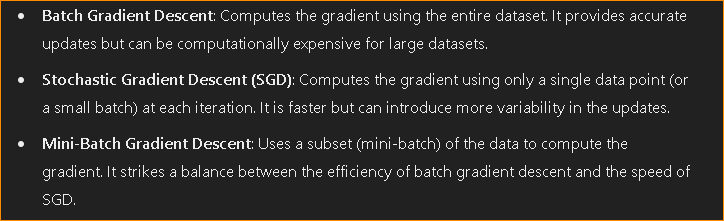

### 2. Polynomial Regression

- When there is a non-linear relation b/w input & target variable
- Instead of fitting a stright line or plane, polynomial regression fits a curved line to be able to capture more complex relationships
- 
- Polynomial Regression adds a polynomial term to the input & model will be trained on new input data

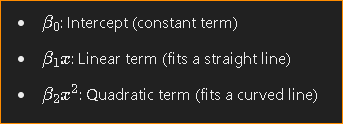

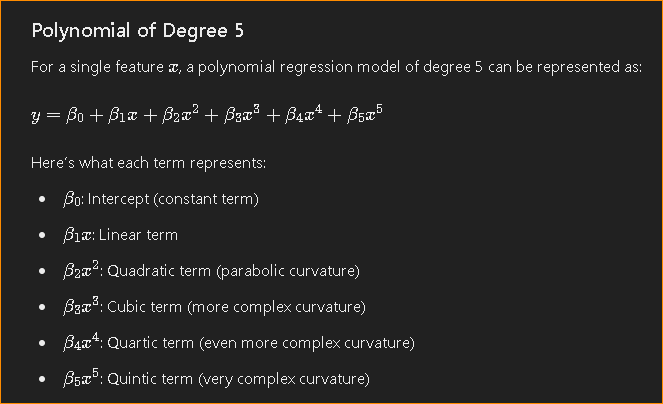

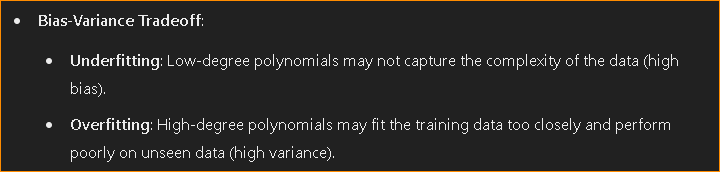

### 3. Regression Analysis -- what makes the price go up?

In [84]:
import pandas as pd
import statsmodels.api as sm

# Example DataFrame (replace with your actual data)
# df_final_cleaned = pd.read_csv('your_data.csv')

# Separate features and target variable
X = df_final_cleaned.drop('price', axis=1)
y = df_final_cleaned['price']

# Convert X to DataFrame if necessary
X = pd.DataFrame(X)

# Add a constant (intercept) term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     202.5
Date:                Fri, 23 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:50:53   Log-Likelihood:                -598.50
No. Observations:                1018   AIC:                             1241.
Df Residuals:                     996   BIC:                             1349.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- **1st Box**
- This suggests 80% accuracy based on adjusted r2 score
- Prob (F-statistic) 0.00 says that atleast 1 column is important for prediction
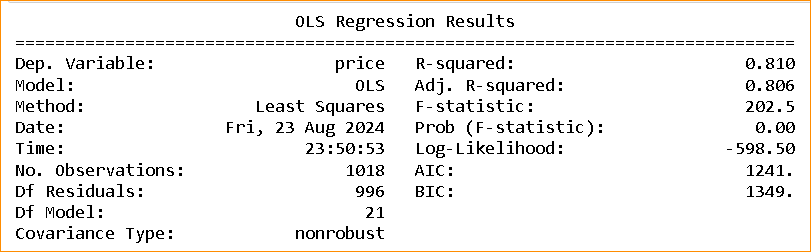

- **2nd Box**
- How important each features are for prediction?
- specScore, storage, ram, processor_encoded, storage_type_encoded, ram_type_encoded, graphics_category_encoded, resolution_category_encoded are relevant features along with thier confidence interval value
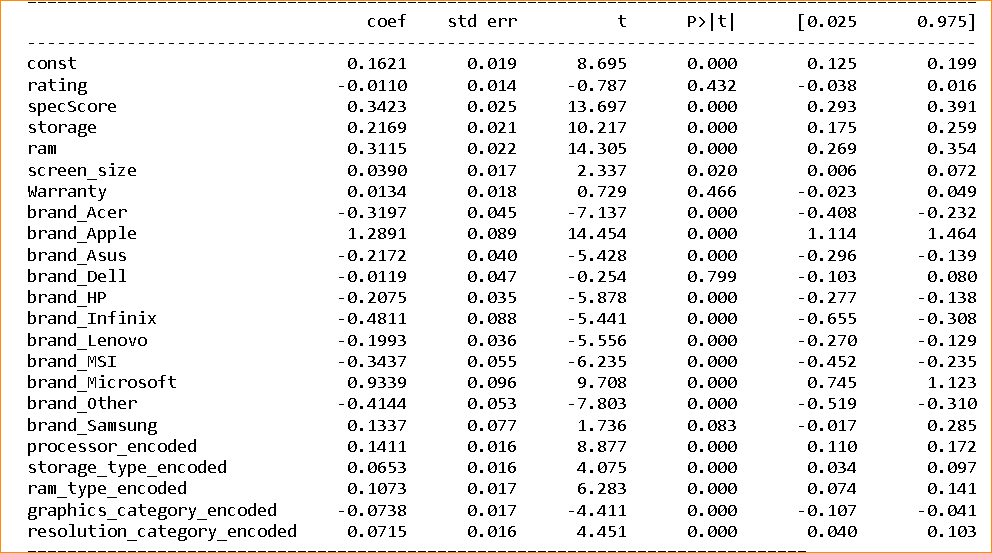

- **3rd box**
- Omnibus Test: Omnibus test is used to check if the residuals (errors) of the model are normally distributed, In this case, the p-value is 0.000, which indicates a strong rejection of the null hypothesis that residuals are normally distributed.

- Jarque-Bera (JB) Test: Jarque-Bera test is another test for normality of residuals, combining skewness and kurtosis. p-value close to 0 indicate that the residuals deviate significantly from a normal distribution

- Skew: Skewness measures the asymmetry of the residuals' distribution. A positive skew indicates that the distribution is skewed to the right (i.e., long tail on the right side)

- Kurtosis measures the "tailedness" of the residuals' distribution. High kurtosis indicates heavy tails and/or outliers

- Durbin-Watson Statistic- Its tests for autocorrelation (serial correlation) in the residuals of a regression analysis.
    - Values around 2 suggest no autocorrelation.
    - Values approaching 0 suggest positive autocorrelation.
    - Values approaching 4 suggest negative autocorrelation.
    - A value of 1.891 is close to 2, indicating there is no significant autocorrelation in the residuals.

- Condition Number: condition number measures multicollinearity, which is the extent to which independent variables are correlated with each other. A very high condition number (typically above 30 or 100) indicates severe multicollinearity.


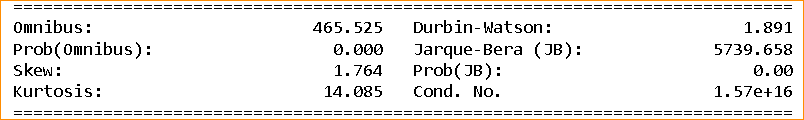

### 4. Feature Selection

### Step1: remove duplicate columns

In [86]:
import pandas as pd
import hashlib

def get_duplicate_columns(df):
    """
    Identify duplicate columns in a DataFrame based on their data.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    dict: A dictionary where the keys are lists of duplicate column names and values are lists of these columns.
    """
    duplicate_columns = {}
    seen_columns = {}
    
    for column in df.columns:
        current_column = df[column]
        
        # Convert column data to bytes for hashing
        try:
            current_column_bytes = current_column.values.tobytes()
        except AttributeError:
            current_column_bytes = current_column.to_string().encode()
        
        # Create a hash of the column data
        current_column_hash = hashlib.md5(current_column_bytes).hexdigest()
        
        # Check if the hash is already seen
        if current_column_hash in seen_columns:
            # Add column to duplicate list
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column
    
    return duplicate_columns

In [89]:
get_duplicate_columns(X_train)

{}

In [90]:
#there are no duplicate columns

### Apply Feature Selection Techniques

- to reduce features which will reduce training time & increase prediction time
- model will perform faster

**Filter Based Techniques**

1. variance threshold: Variance Threshold is a method to remove unnecessary features (columns) from our data that don't change much and hence, don't contribute to the prediction. This method doesnt check relation with target but only works  individually.

2. Corelation: Again only checks corelation with input & target & not with other columns

3. ANOVA (Hypothesis Test): When we have numerical col in input & output is categorical with more then 2 classes or output is numerical. Doesn't account for feature interactions

4. Chi-Square: It tells us the relationship b/w 1 input & 1 output col
5. Mutual Information: Mutual Information quantifies the amount of information gained about one feature by knowing the value of another feature. Essentially, it measures how much knowing one feature reduces uncertainty about another.

**Wrapper Techniques**

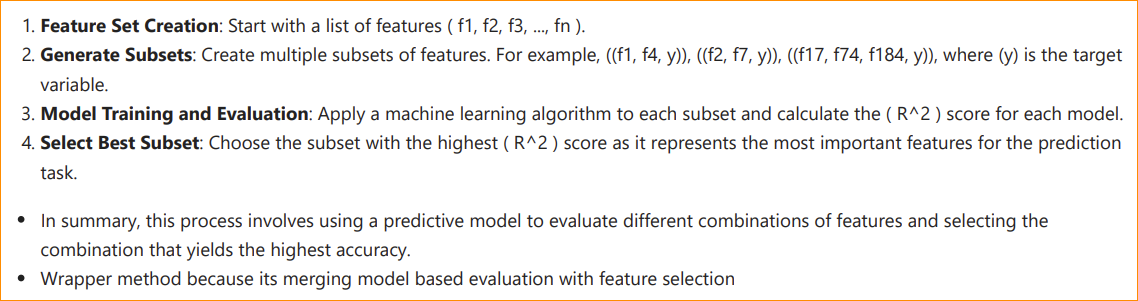
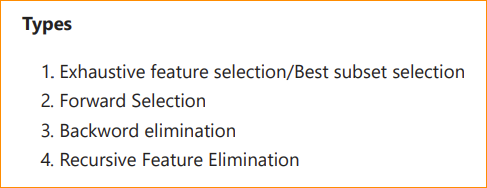



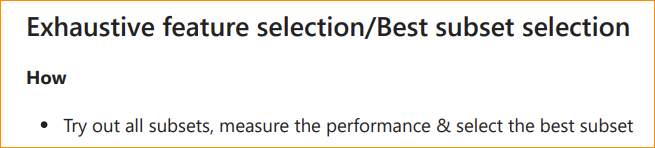


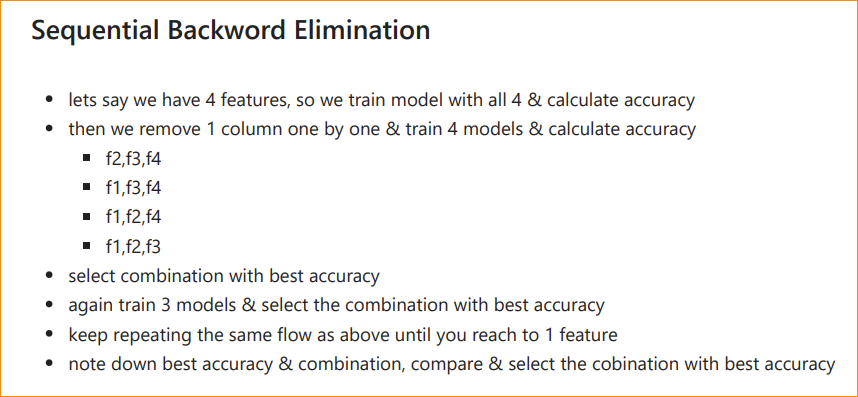


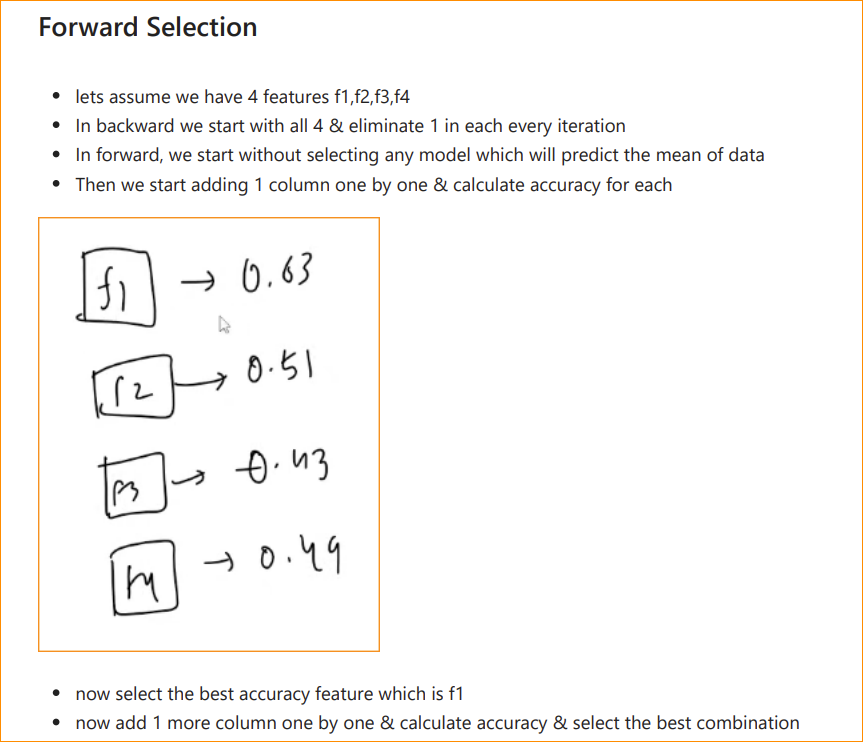

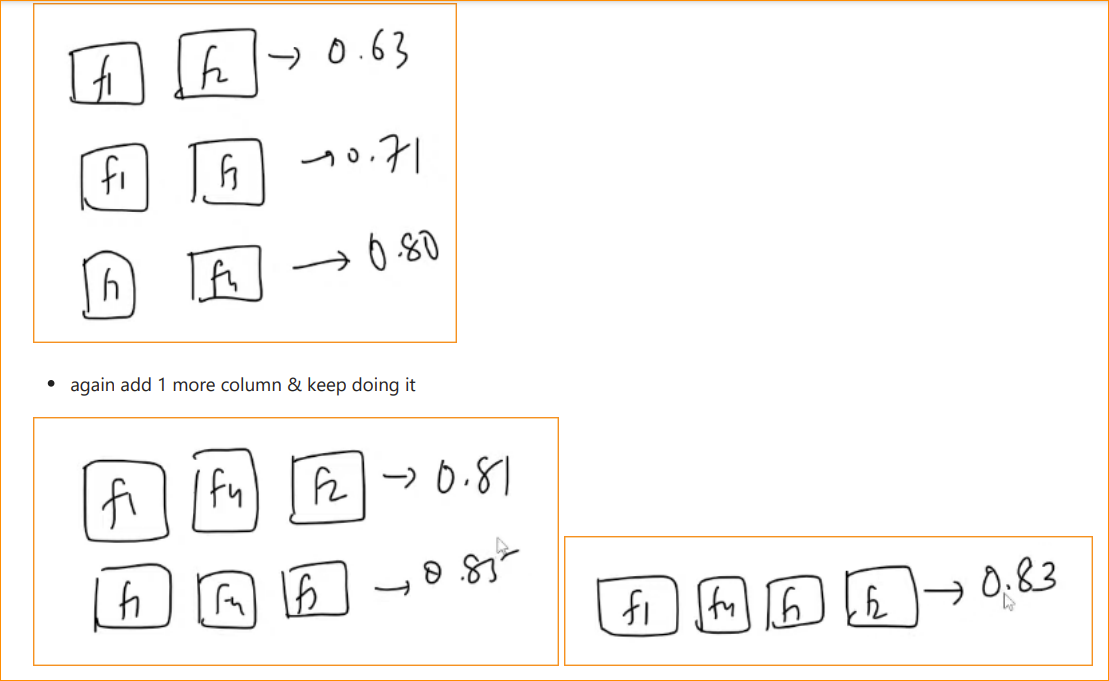

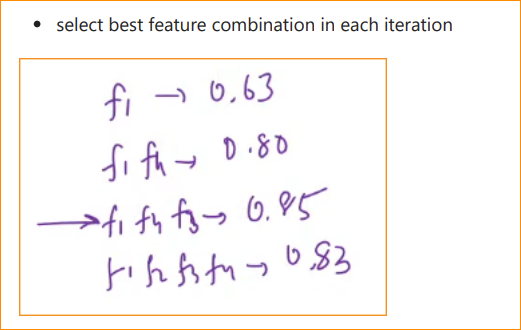

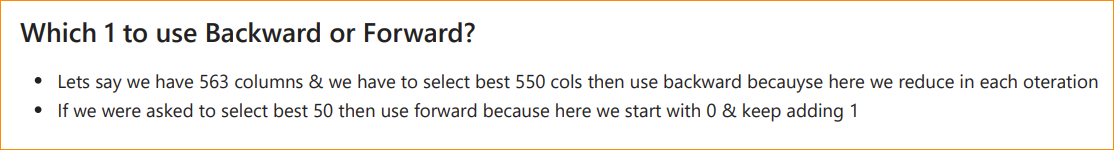

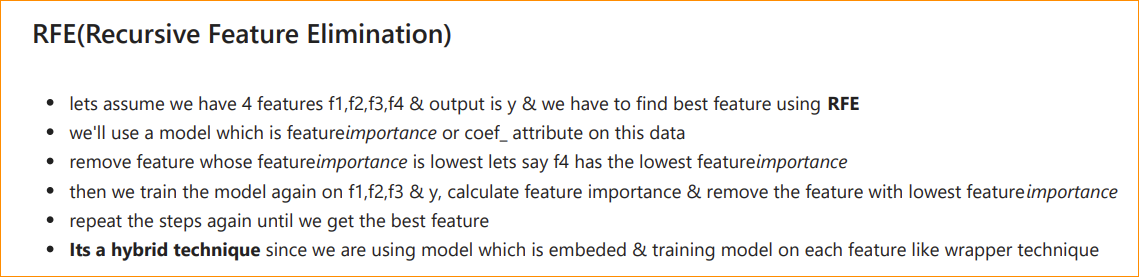

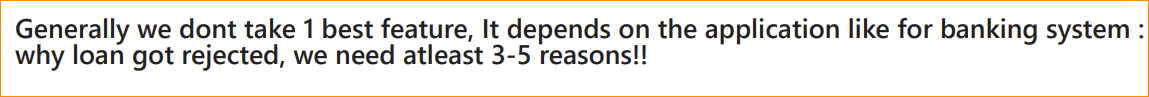


**Embeded Techniques**

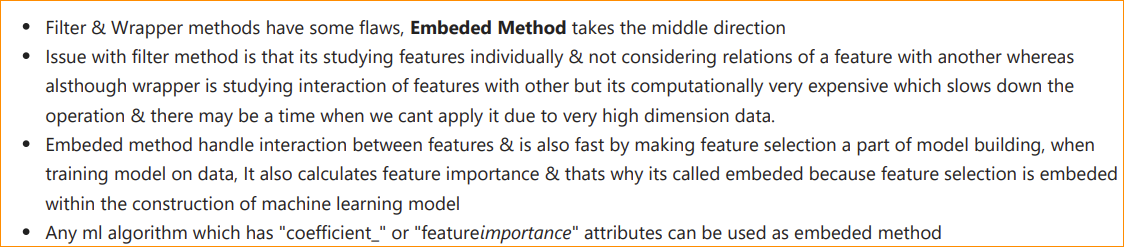

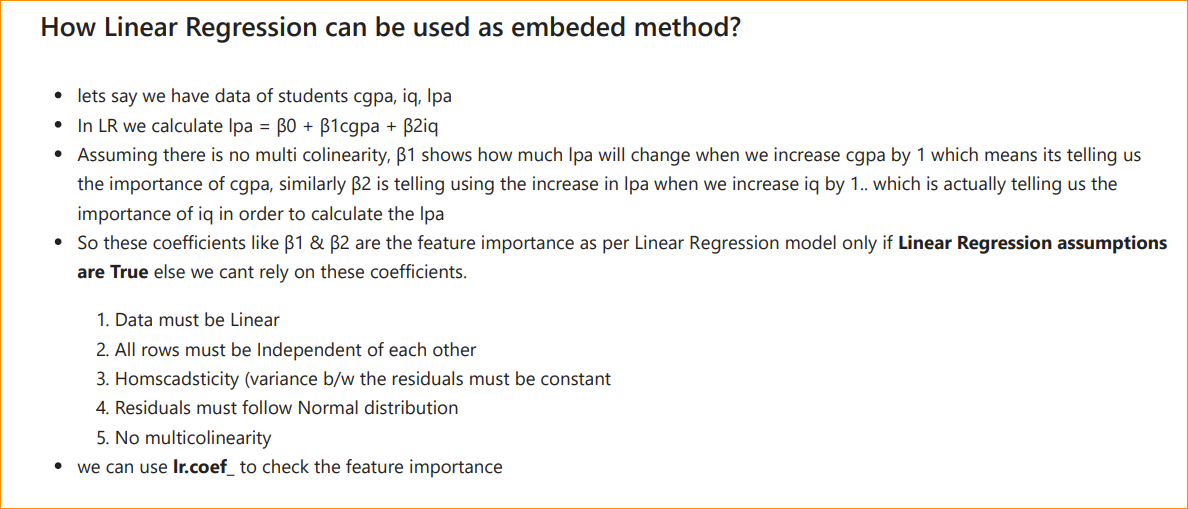

In [94]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Example DataFrame (replace with your actual data)
# df_final_cleaned = pd.read_csv('your_data.csv')

# Separate features and target variable
X = df_final_cleaned.drop('price', axis=1)
y = df_final_cleaned['price']

# Optional: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # You can tune the alpha parameter
lasso.fit(X_train, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Create a DataFrame to store feature names and their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Filter out features with zero coefficients
non_zero_features = feature_importance[feature_importance['Coefficient'] != 0]

# Sort features by their coefficients in ascending order
sorted_features = non_zero_features.sort_values(by='Coefficient')

# Print the sorted features
print("Selected Features in Ascending Order of Coefficients:")
print(sorted_features)

Selected Features in Ascending Order of Coefficients:
                        Feature  Coefficient
19             ram_type_encoded     0.017605
21  resolution_category_encoded     0.045456
14              brand_Microsoft     0.053388
17            processor_encoded     0.099483
7                   brand_Apple     0.115642
2                       storage     0.165130
1                     specScore     0.239185
3                           ram     0.353788


### 5. Regularization

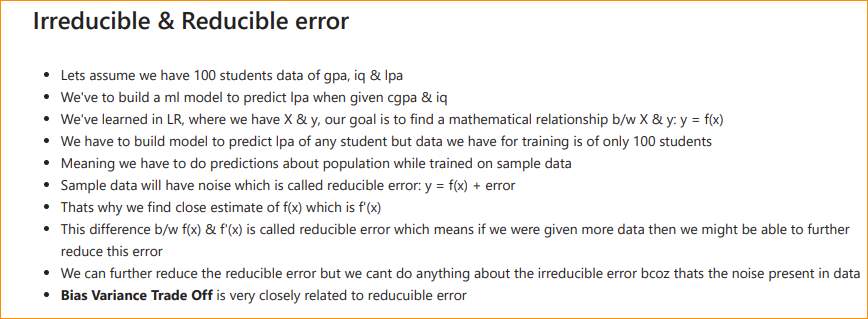

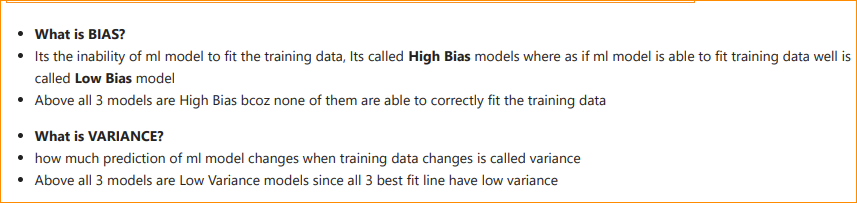

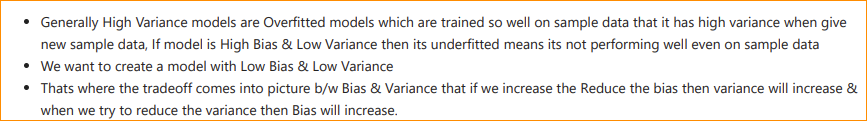

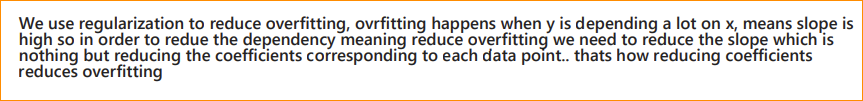

### 6. How to use Grid Search CV?

- Grid Search Cross-Validation (Grid Search CV) is a powerful technique for hyperparameter tuning in machine learning models. It systematically searches through a specified set of hyperparameters to find the optimal combination that yields the best performance for your model. In scikit-learn, GridSearchCV is the class used for this purpose.

In [95]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Example DataFrame (replace with your actual data)
# df_final_cleaned = pd.read_csv('your_data.csv')

# Separate features and target variable
X = df_final_cleaned.drop('price', axis=1)
y = df_final_cleaned['price']

# Optional: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
lasso = Lasso()

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Range of alpha values to test
}

# Set up Grid Search CV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Review results
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score (Negative Mean Squared Error):", best_score)
print("Best Model:", best_model)

# Optional: Test the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test Score (R^2):", test_score)

Best Parameters: {'alpha': 0.01}
Best Score (Negative Mean Squared Error): -0.2097832872102952
Best Model: Lasso(alpha=0.01)
Test Score (R^2): 0.8089290052300607


### 7. Linear Regression assumptions check

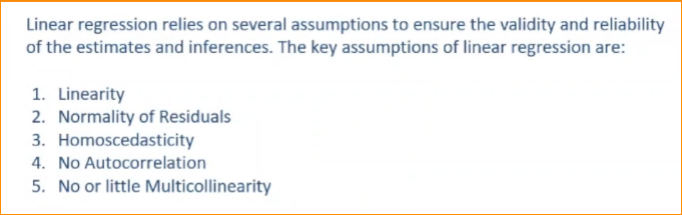

1. **Linearity:** There is a linear relationship b/w independent & dependent variable, Model assumes that when when x increases y will also increase & when x decreases y will also decreases 
    
    - **what if it fails?**
    - If this fails, We develop a bias that data is linear whereas data is not linaer which leads to poor model performance.
    - Since model was biased of being linear, It couldnot capture the true relationship between independent& dependent variable leading to higher errors in prediction
    - Invalid Hypothesis tests & Confidence Intervals
    
    - **How to check**
    - Plot a Scatter or ResidualPlot
    - Use Ploynomial Regression: If r2 score improving when comparing r2 score of linear regression fit model then it shows data is non linear
    
    -**What to do?**
    - Apply Transformations like square-root, log, boxcox, yojohnson(best) etc & test
    - Use Polynomial regression instead of linear regression
    - Use Peicewise regression: Piecewise regression fits different straight lines to segments of data that change at specific points (knots). This method captures shifts in trends more accurately than a single line.
    - Use Non-Parametric or Semi-Parametric machine learning models which doesnt rely on linearity assumptions


    
    

Missing values in features before splitting:
 rating                         0
specScore                      0
storage                        0
ram                            0
screen_size                    0
Warranty                       0
brand_Acer                     0
brand_Apple                    0
brand_Asus                     0
brand_Dell                     0
brand_HP                       0
brand_Infinix                  0
brand_Lenovo                   0
brand_MSI                      0
brand_Microsoft                0
brand_Other                    0
brand_Samsung                  0
processor_encoded              0
storage_type_encoded           0
ram_type_encoded               0
graphics_category_encoded      0
resolution_category_encoded    0
dtype: int64
Missing values in target variable: 0
Missing values in transformed target variable: 0
Missing values in predictions: 0
Missing values in y_test_original: 0
Mean Squared Error: 0.47609786262274734
R-squared: 0.488231

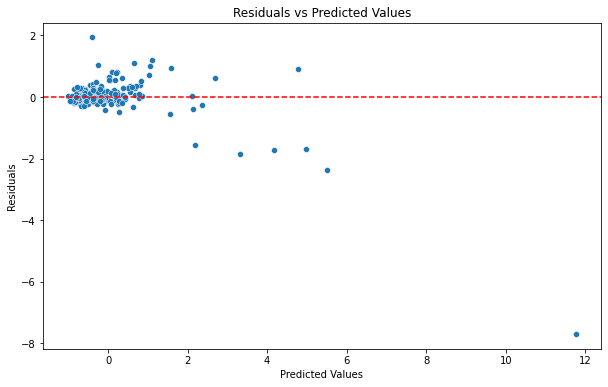

In [123]:
#yo-johnson transformation

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (replace with your actual data)
# df_final_cleaned = pd.read_csv('your_data.csv')

# Separate features and target variable
X = df_final_cleaned.drop('price', axis=1)
y = df_final_cleaned['price']

# Check for missing values
print("Missing values in features before splitting:\n", X.isna().sum())
print("Missing values in target variable:", y.isna().sum())

# Handle missing values if necessary (imputation or removal)
X = X.fillna(X.mean())  # Example: Impute missing values with the mean
y = y.fillna(y.mean())  # Example: Impute missing values with the mean

# Apply Yeo-Johnson transformation to the target variable
pt = PowerTransformer(method='yeo-johnson')
y_transformed = pt.fit_transform(y.values.reshape(-1, 1)).ravel()

# Check for NaNs in the transformed target variable
print("Missing values in transformed target variable:", pd.Series(y_transformed).isna().sum())

# Split the data into training and testing sets
X_train, X_test, y_train_transformed, y_test_transformed = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train_transformed)

# Predict on the test set
y_pred_transformed = model.predict(X_test)

# Inverse transform predictions to original scale
y_pred = pt.inverse_transform(y_pred_transformed.reshape(-1, 1)).ravel()
y_test_original = pt.inverse_transform(y_test_transformed.reshape(-1, 1)).ravel()

# Check for NaNs in predictions and transformed test set
print("Missing values in predictions:", np.isnan(y_pred).sum())
print("Missing values in y_test_original:", np.isnan(y_test_original).sum())

# Calculate performance metrics
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Print results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optional: Plot residuals to check for homoscedasticity
residuals = y_test_original - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

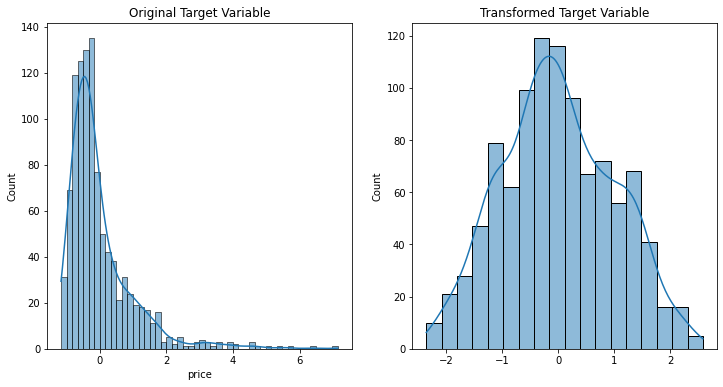

Mean Squared Error: 0.47609786262274734
R-squared: 0.4882314498772913


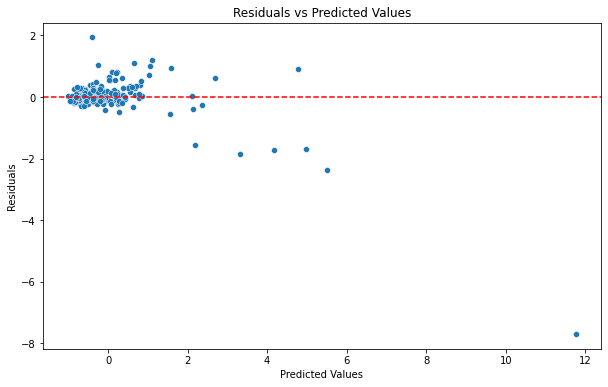

In [122]:
# Check the distribution before and after transformation
plt.figure(figsize=(12, 6))

# Original target variable
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True)
plt.title('Original Target Variable')

# Transformed target variable
plt.subplot(1, 2, 2)
sns.histplot(y_transformed, kde=True)
plt.title('Transformed Target Variable')

plt.show()

# Predict and inverse transform
y_pred_transformed = model.predict(X_test)
y_pred = pt.inverse_transform(y_pred_transformed.reshape(-1, 1)).ravel()
y_test_original = pt.inverse_transform(y_test_transformed.reshape(-1, 1)).ravel()

# Calculate performance metrics
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Print results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot residuals
residuals = y_test_original - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [135]:
#yo-johnson transofrmation is not working correctly, we can use polynomial regression or peicewise regression & check if accuracy increases

- **2. Normality of residual**
- Error terms(residuals y-yhat) are assumed to follow a normal distribution with mean of zero & constant variance 
- **What happens when this assumptions failed?** --> All hypothesis test will fail, regression analysis uses f-test & t-test & so does the "confidence interval"
- Model performance: voilation of normality assumptions may indicate that chosen model is not best fit for data leads to incorrect predictions or reduced accuracy
- **How to check Assumptions?** --> 
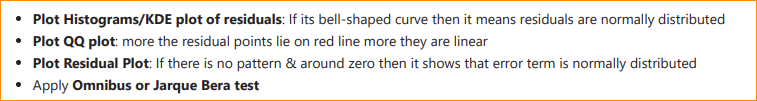
- **What to do when this Assumption fails?**
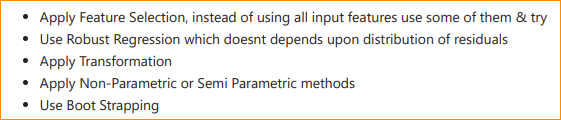
- If n > 30 then "Normality of Residual Assumptions" do not require due to central limit theorem which says sampling distribution will always be normal distribution if n>30 which will be the case always so no need to worry about this

- **3. Homoscedasticity**
- **What is?** Spread of the error terms (residuals) should be constant accross all levels of independent variable X is called Homoscedasticity

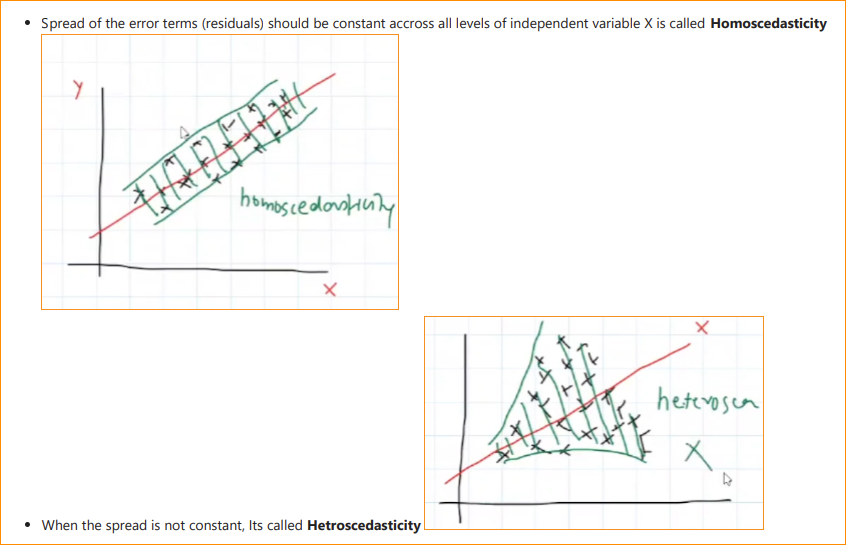
- **What if this assumption fails?**
- SE of coefficients will not be reliable which leads to incorrect t-statistic, invalid p-value & invalid CI

- **How to check this assumption?**
- residual plot

- **what to do if fails**
- Transform the Dependent Variable Logarithmic , Square root, Box-Cox transformation
- Transform the Independent Variables 
- Weighted Least Squares (WLS): Instead of ordinary least squares (OLS), use WLS regression. This method adjusts for heteroscedasticity by giving different weights to observations based on their variance.

- **4. Multicolinearity**
- Multicolinearity occurs when 2 or more independent variables in multiple linear regression are highly corelated
- 2 variable having strong linear relationship means 1 move with another which makes it difficult to isolate the individual effect of each variable on dependent variable

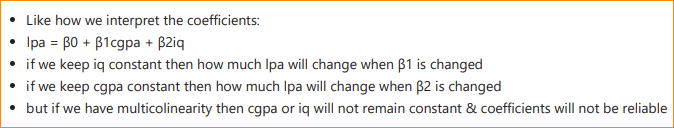

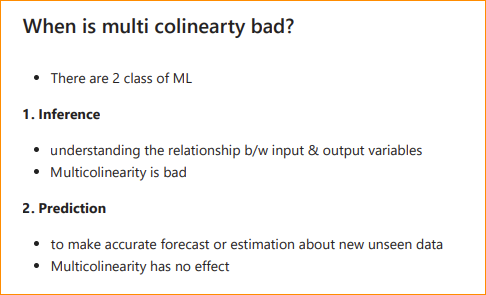

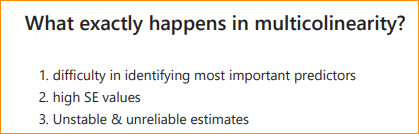

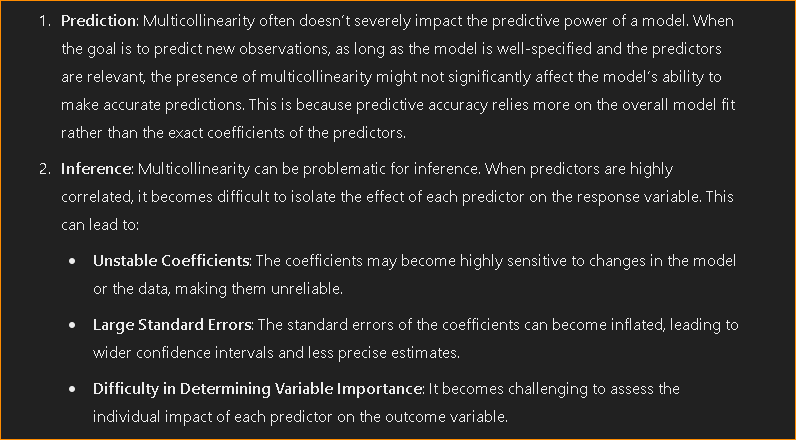

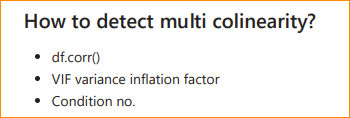

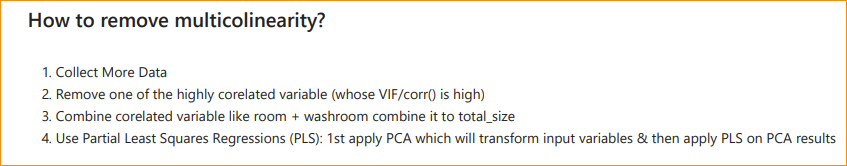

- VIF

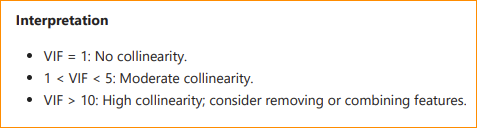

### 8. Use of Transformations

In [137]:
#not yet started